# Preprocessing
Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

%matplotlib inline

### Import datasets
Only signals from on-body sensors are selected, excluding columns from 33 to 36 (where time is column 0) which are completely NaN:

In [2]:
root = ".\OpportunityUCIDataset\dataset\S"

idx_signals = list(np.arange(0,34)) \
            + list(np.arange(37,46)) \
            + list(np.arange(50,59)) \
            + list(np.arange(63,72)) \
            + list(np.arange(76,85)) \
            + list(np.arange(89,98)) \
            + list(np.arange(102,134))
idx_labels  = list([0]) \
            + list(np.arange(243,250))

In [3]:
for sub in [1]:#[1,2,3,4]:
    
    for sess in [1]:#[1,2,3,4,5,6]:
        
        if sess < 6:
            
            filename = root + str(sub) + "-ADL" + str(sess) + ".dat"
            print("Importing from: ", filename)
            
            data = pd.read_table(filename,
                                 sep="\s+",
                                 header=None,
                                 prefix="f",
                                 index_col=0,
                                 usecols=idx_signals)
            
            label = pd.read_table(filename,
                                  sep="\s+",
                                  header=None,
                                  prefix="l",
                                  index_col=0,
                                  usecols=idx_labels)

        else:
            filename = root + str(sub) + "-Drill.dat"
            print("importing from: ", filename)

print("Done.")

Importing from:  .\OpportunityUCIDataset\dataset\S1-ADL1.dat
Done.


In [4]:
print("Imported DataFrame of sizes:     data:", data.shape, "     label:", label.shape)

Imported DataFrame of sizes:     data: (51116, 110)      label: (51116, 7)


In [5]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133
f0,,,,,,,,,,,,,,,,,,,,,
0,87.0,975.0,-287.0,11.0,1001.0,163.0,95.0,975.0,152.0,195.0,...,-219.0,319.0,-845.0,-20.0,57.0,42.0,57.0,20.0,42.0,175.0
33,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,226.0,...,-215.0,325.0,-847.0,-17.0,38.0,31.0,38.0,17.0,31.0,175.0
67,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,280.0,...,-219.0,328.0,-852.0,27.0,31.0,15.0,31.0,-27.0,15.0,175.0
100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,360.0,...,-221.0,321.0,-852.0,26.0,22.0,-2.0,22.0,-26.0,-2.0,175.0
133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,548.0,...,-213.0,321.0,-850.0,22.0,45.0,-7.0,45.0,-22.0,-7.0,175.0


In [6]:
label.head()

,l243,l244,l245,l246,l247,l248,l249
l0,,,,,,,
0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0
133,0,0,0,0,0,0,0


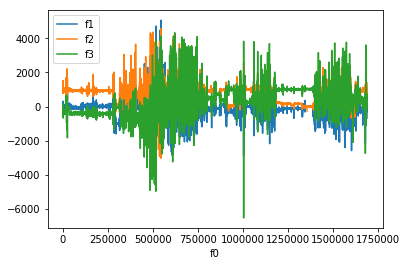

In [13]:
data[['f1','f2','f3']].plot()

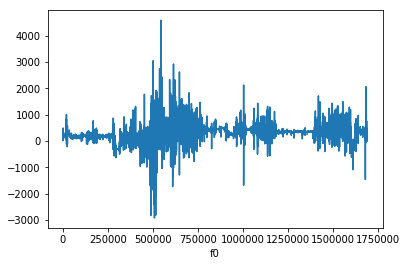

In [11]:
series = np.mean(data[['f1','f2','f3']], axis=1)
series.plot()

In [8]:
occ = label['l243'].value_counts()

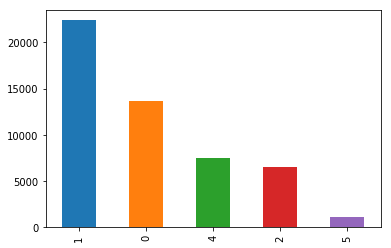

In [9]:
occ.plot(kind='bar')

### Interpolate NaN values
pandas interpolation is very slow, so wait for it!